# PyTorch for Deep Learning - Intro

[YouTube-Video von freeCodeCamp.org](https://youtu.be/GIsg-ZUy0MY)

## Tensor
[Tensor](https://pytorch.org/docs/stable/tensors) ist die zentrale Datenstruktur von PyTorch. Ein Tensor ist ein multidimensionales Array:
* 1D: Skalar, `torch.tensor(4)`
* 2D, 1xM: Vektor, `torch.tensor([1, 2, 3])`
* 2D, NxM: Matrix, `torch.tensor([[1, 2], [3, 4]])`
* 3D: multidimensionale Matrix, `torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])`
* ...

In [11]:
import torch
from torch import tensor

In [2]:
# Skalar
tensor(4)

tensor(4)

In [3]:
# Vektor
tensor([1, 2, 3])

tensor([1, 2, 3])

In [4]:
# NxM-Matrix
tensor([[1, 2], [3, 4]])

tensor([[1, 2],
        [3, 4]])

In [5]:
# NxMxD-Matrix
tensor(
    [
        [[1, 2],
         [3, 4]],
        [[5, 6],
         [7, 8]]
    ]
)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [6]:
# etc.
torch.tensor([[[[1, 2], [3, 4]], [[5, 6], [7, 8]]], [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]])

tensor([[[[1, 2],
          [3, 4]],

         [[5, 6],
          [7, 8]]],


        [[[1, 2],
          [3, 4]],

         [[5, 6],
          [7, 8]]]])

## PyTorch und NumPy
Tensoren teilen einige Features mit NumPy Arrays:

In [7]:
(tensor(4).dtype, tensor([[1, 2], [3, 4]]).shape)

(torch.int64, torch.Size([2, 2]))

Auch arithmetische Operationen sind möglich:

In [8]:
tensor([[2, 2], [3, 3]]) + tensor([[2, 2], [2, 2]])

tensor([[4, 4],
        [5, 5]])

Tensoren können aus NumPy Arrays erzeugt werden:

In [9]:
import numpy as np
a = np.array([[1, 2], [3, 4]])

In [10]:
# erstellt Kopie vom Array
tensor(a)

tensor([[1, 2],
        [3, 4]])

In [11]:
# erstellt keine Kopie
torch.from_numpy(a)

tensor([[1, 2],
        [3, 4]])

Tensoren können in NumPy Arrays umgewandelt werden:

In [12]:
tensor(4).numpy()

array(4)

## Bilder als Tensor
Rasterbilder und Tensoren können problemlos ineinander umgewandelt werden:

img.shape: (256, 256, 4)
t.shape: torch.Size([256, 256, 4])


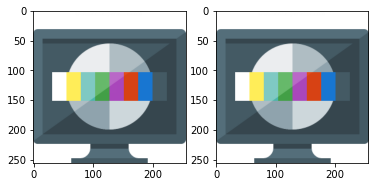

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

img = np.array(Image.open('test.png'))
t = torch.from_numpy(img)
print('img.shape:', img.shape)
print('t.shape:', t.shape)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[1].imshow(t)

**VORSICHT**: Bibliotheken wie matplotlib gehen davon aus, dass Bilder in der Form `Höhe x Breite x Kanäle` gespeichert sind. PyTorch arbeitet aber mit `Kanäle x Höhe x Breite`. Um also Bilder als Tensoren in PyTorch zu benutzen, müssen die Dimensionen mit `permute` vertauscht werden:

In [18]:
t_neu = t.permute(2, 0, 1)
t_neu.shape

torch.Size([4, 256, 256])

## Ein Beispiel: Lineare Regression

| Region | Temp. (° c) | Niederschl. (mm) | Luftfeuchte (%) | Äpfel (t/ha) | Orangen (t/ha) |
|--------|:-----------:|:----------------:|:---------------:|:------------:|:--------------:|
| Kanto  |      22     |        67        |        43       |      56      |       70       |
| Johto  |      32     |        88        |        64       |      81      |       101      |
| Hoenn  |      30     |        134       |        58       |      119     |       133      |
| Sinnoh |      38     |        43        |        37       |      22      |       37       |
| Unova  |      20     |        96        |        70       |      103     |       119      |

    apples = w11 * T + w12 * N + w13 * LF + b1

    oranges = w21 * T + w22 * N + w32 * LF + b2
    
    X * W^T + b

In [13]:
input = tensor([[22, 67, 43],
                [32, 88, 64],
                [30, 134, 58],
                [38, 43, 37],
                [20, 96, 70]], dtype=torch.float32)

target = tensor([[56, 70],
                 [81, 101],
                 [119, 133],
                 [22, 37],
                 [103, 119]], dtype=torch.float32)

Die Gewichte `wij` und die Bias-Terme `bi` werden zufällig initialisiert. `torch.randn` liefert einen Tensor mit standardnormalverteilten Zufallszahlen:

In [14]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

`requires_grad` kontrolliert, ob Änderungen am Tensor aufgezeichnet werden sollen, um Berechnung des Gradienten zu ermöglichen.

Damit können wir ein Modell bauen:

In [15]:
 def model(x):
    # @: Matrixmultiplikation
    return x @ w.t() + b

prediction = model(input)
prediction

tensor([[ 7.9038e+01,  7.3163e-02],
        [ 1.1122e+02,  9.6434e+00],
        [ 1.2557e+02, -3.5306e+01],
        [ 6.5939e+01,  1.3160e+01],
        [ 1.1802e+02,  9.8146e+00]], grad_fn=<AddBackward0>)

Zum Optimieren brauchen wir eine Loss-Funktion wie z. B. MSE:

In [16]:
def mse(prediction, target):
    diff = prediction - target
    # numel is total number of elements
    return torch.sum(diff * diff / diff.numel())

loss_initial = mse(prediction, target)
loss_initial

tensor(5769.5527, grad_fn=<SumBackward0>)

Da die Gewichte und Bias-Terme `requires_grad` aktiviert haben, kann PyTorch automatisch den Gradienten der Loss-Funktion bestimmen. Die einzelnen Werte werden im Attribut `.grad` des jeweiligen Tensors gespeichert:

In [17]:
loss_initial.backward()

print(w.grad)
print(b.grad)

tensor([[  728.2032,  1682.9070,  1196.5468],
        [-2520.1179, -9356.8672, -5428.0898]])
tensor([ 23.7569, -92.5228])


Damit können die Gewichte und Bias-Terme gemäß dem Gradientenabstieg akutalisiert werden. `torch.no_grad()` signalisiert, dass die folgenden Operationen nicht für die nächste Gradientenberechnung aufgezeichnet werden sollen:

In [18]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    # Gradienten zurücksetzen (Werte werden sonst akkumuliert)
    w.grad.zero_()
    b.grad.zero_()

Mit den aktualisierten Parametern können neue Vorhersagen berechnet werden. Der Loss ist im Vergleich zu den ersten Vorhersagen bereits verringert:

In [19]:
prediction = model(input)
loss = mse(prediction, target)
(loss_initial, loss)

(tensor(5769.5527, grad_fn=<SumBackward0>),
 tensor(4564.3179, grad_fn=<SumBackward0>))

Jetzt kann alles zusammengefügt und in z. B. 1000 Epochen wiederholt werden:

In [25]:
# Modell zurücksetzen
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

for i in range(1000):
    prediction = model(input)
    loss = mse(prediction, target)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
    if i % 100 == 0:
        print(f'Loss after {i} epochs: {loss}')

print(prediction)
print(target)

Loss after 0 epochs: 17579.1953125
Loss after 100 epochs: 323.1888427734375
Loss after 200 epochs: 227.06295776367188
Loss after 300 epochs: 160.89779663085938
Loss after 400 epochs: 115.18598937988281
Loss after 500 epochs: 83.46249389648438
Loss after 600 epochs: 61.327552795410156
Loss after 700 epochs: 45.783119201660156
Loss after 800 epochs: 34.784183502197266
Loss after 900 epochs: 26.933162689208984
